# Actual and corrected run statistics

To do:
* Make a function with uses the age_speed_poly polynomial fit (continuous) rather than age_speed_table (discrete)
* Use fractional ages, rather than whole years
* Make a table of world records, and use this to create a polynomial fit called distance_worldrecord_poly
* Correct every run to equivalent mile time (using distance_worldrecord_poly)
* Correct every run to equivalent age-corrected mile time (using age_speed_poly)

      MPH_diff
Age           
25        0.00
26        0.00
27        0.02
28        0.03
29        0.05
..         ...
86        6.74
87        7.02
88        7.30
89        7.59
90        7.87

[66 rows x 1 columns]


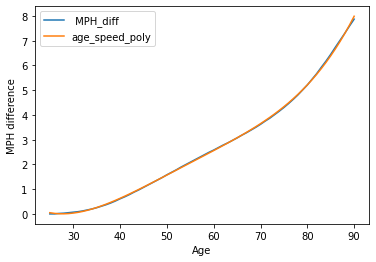

In [152]:
# According to tables from https://www.bigdatarunning.com, the most accurate age 
# adjustment to running times, may be based on a fixed decline in running speed 
# with age, across all distances
import pandas as pd
age_speed_table = pd.read_csv('running_speed_decline.csv', index_col=0)
print(age_speed_table)
age_speed_table.plot(label='age_speed_table')
plt.ylabel('MPH difference')

# Fit a polynomial at same x
age_speed_poly = np.polynomial.polynomial.Polynomial.fit(age_speed_table.index, age_speed_table[' MPH_diff'], 4)
plt.plot(age_speed_table.index, age_speed_poly(age_speed_table.index), label='age_speed_poly')
plt.legend()

In [154]:
# Function based on the age_speed_table
def adjust_race_time_to_age_25(age, miles, mins, secs):
    hours = mins/60 + secs/3600
    mph = miles / hours
    if age>25:
        mph_diff = df[df.index==age][' MPH_diff']
    else:
        mph_diff = 0.00
    mph_at_25 = mph + mph_diff
    fractional_minutes_at_25 = (miles * 60.0 / mph_at_25)
    minutes_at_25 = np.floor(fractional_minutes_at_25)
    seconds_at_25 = np.round(60.0*(fractional_minutes_at_25 - minutes_at_25))
    return (minutes_at_25, seconds_at_25)

In [153]:
# Interactive use

# Get inputs
print('User input:')
age = int(input('\tAge (in years)'))
miles = float(input('\tDistance (in miles)'))
minsecs = input('\tRun time (minutes:seconds)').split(':')
mins = int(minsecs[0])
secs = int(minsecs[1])

# Compute
(mins25, secs25) = adjust_race_time_to_age_25(age, miles, mins, secs)
print('time at age 25 = %d:%d' % (mins25, secs25))

User input:
	Age (in years)50
	Distance (in miles)6.215
	Run time (minutes:seconds)43:00
time at age 25 = 36:22


In [156]:
# Read in the Master running spreadsheet
races = pd.read_excel('/Users/gt/Dropbox/PERSONAL/Health_and_Fitness/Results/ALL_RACES_2021.xlsx', 'RUN MASTER')

# Process each row, writing out corrected time & pace to a new file
corrected_file = 'corrected_race_results.csv'
import datetime
from dateutil.relativedelta import relativedelta
myBirthday = datetime.datetime(1971,7,18,0,0,0,0)
with open(corrected_file, 'w') as f:
    f.write('Date, Age, Miles, Mins, Pace, Mins25, Pace25, Description\n')
    for i,row in races.iterrows():
        try:   
            if not isinstance(row['Miles'], (float, int)):
                continue
            if not isinstance(row['Mins'], (float, int)):
                continue      
            if not isinstance(row['Secs'], (float, int)):
                continue
            if pd.isna(row['Miles']) or pd.isna(row['Mins']) or pd.isna(row['Secs']):
                continue

            age = relativedelta(row['DATE'], myBirthday)

            (mins25, secs25) = adjust_race_time_to_age_25(age.years, float(row['Miles']), int(row['Mins']), int(row['Secs']) )
            decimal_mins = row['Mins']+row['Secs']/60
            decimal_mins25 = mins25+secs25/60
            pace = decimal_mins / row['Miles']
            pace25 = decimal_mins25 / row['Miles']
            f.write('%s, %2d, %6.3f, %6.2f, %5.2f, %6.2f, %5.2f, %s\n' % (row['DATE'].strftime('%Y-%m-%d'), age.years, row['Miles'], decimal_mins, pace, decimal_mins25, pace25, row['DESCRIPTION'].replace(',', ' ')) )
        except:
            continue

In [ ]:
# Read the corrected file & make plots
corrected_races = pd.read_csv(corrected_file)
corrected_races.dropna(inplace=True)

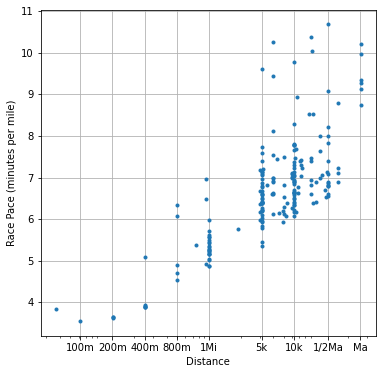

In [131]:
# Race pace
fix, ax = plt.subplots(figsize=(6, 6))
plt.semilogx(corrected_races[' Miles'], corrected_races[' Pace'], '.')
ax.set_xticks([100/1609, 200/1609, 400/1609, 800/1609, 1, 3.1075, 6.215, 13.1, 26.2])
#ax.set_yticks(np.arange(3, 11, 1))
ax.set_xticklabels(['100m', '200m', '400m', '800m', '1Mi', '5k', '10k', '1/2Ma', 'Ma'])
ax.set_ylabel('Race Pace (minutes per mile)')
ax.set_xlabel('Distance')
ax.grid()

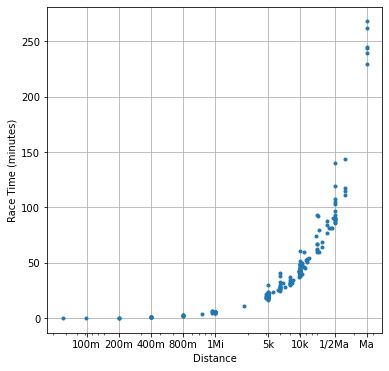

In [132]:
# Race time
fix, ax = plt.subplots(figsize=(6, 6))
plt.semilogx(corrected_races[' Miles'], corrected_races[' Mins'], '.')
ax.set_xticks([100/1609, 200/1609, 400/1609, 800/1609, 1, 3.1075, 6.215, 13.1, 26.2])
#ax.set_yticks(np.arange(3, 11, 1))
ax.set_xticklabels(['100m', '200m', '400m', '800m', '1Mi', '5k', '10k', '1/2Ma', 'Ma'])
ax.set_ylabel('Race Time (minutes)')
ax.set_xlabel('Distance')
ax.grid()

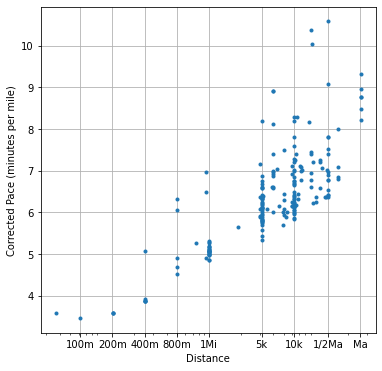

In [128]:
# Corrected pace
fix, ax = plt.subplots(figsize=(6, 6))
plt.semilogx(corrected_races[' Miles'], corrected_races[' Pace25'], '.')
ax.set_xticks([100/1609, 200/1609, 400/1609, 800/1609, 1, 3.1075, 6.215, 13.1, 26.2])
#ax.set_yticks(np.arange(3, 11, 1))
ax.set_xticklabels(['100m', '200m', '400m', '800m', '1Mi', '5k', '10k', '1/2Ma', 'Ma'])
ax.set_ylabel('Corrected Pace (minutes per mile)')
ax.set_xlabel('Distance')
ax.grid()

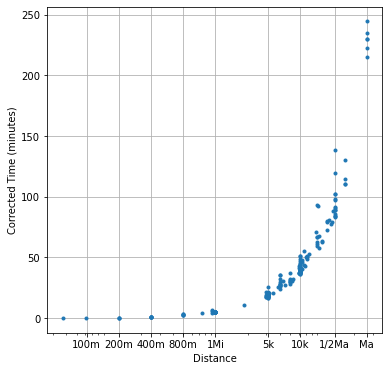

In [130]:
# Corrected time
fix, ax = plt.subplots(figsize=(6, 6))
plt.semilogx(corrected_races[' Miles'], corrected_races[' Mins25'], '.')
ax.set_xticks([100/1609, 200/1609, 400/1609, 800/1609, 1, 3.1075, 6.215, 13.1, 26.2])
#ax.set_yticks(np.arange(3, 11, 1))
ax.set_xticklabels(['100m', '200m', '400m', '800m', '1Mi', '5k', '10k', '1/2Ma', 'Ma'])
ax.set_ylabel('Corrected Time (minutes)')
ax.set_xlabel('Distance')
ax.grid()

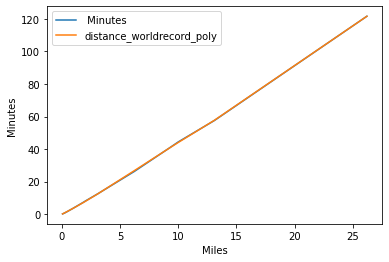

In [159]:
# Read in world record times
worldrecs_table = pd.read_csv('worldrecords.csv', index_col=0)
worldrecs_table.plot(label='worldrecs_table')
plt.ylabel('Minutes')

# Fit a polynomial at same distances
distance_worldrecord_poly = np.polynomial.polynomial.Polynomial.fit(worldrecs_table.index, worldrecs_table[' Minutes'], 4)
plt.plot(worldrecs_table.index, distance_worldrecord_poly(worldrecs_table.index), label='distance_worldrecord_poly')
plt.legend()


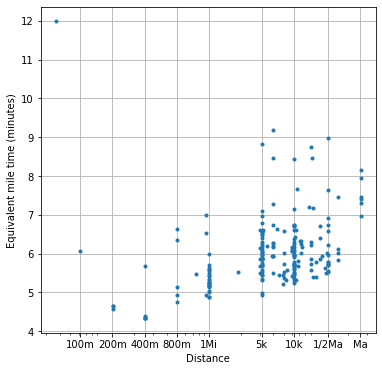

In [167]:
# Correct all races back to equivalent mile time
corrected_races['mile_time']=corrected_races[' Mins']/distance_worldrecord_poly(corrected_races[' Miles']) * distance_worldrecord_poly(1.0)

# This graph effectively shows how good I am relative to world records
# For example, it suggests that given the shape I was in when I set my half-marathon PR in 2007, I could 
# have run one mile in about 5.5 minutes. I think I actually could have run a bit faster than that in 2007,
# and probably did, but this reflects that I am a better mile runner than half marathon runner, compared to
# world records at those distances.
fix, ax = plt.subplots(figsize=(6, 6))
plt.semilogx(corrected_races[' Miles'], corrected_races['mile_time'], '.')
ax.set_xticks([100/1609, 200/1609, 400/1609, 800/1609, 1, 3.1075, 6.215, 13.1, 26.2])
#ax.set_yticks(np.arange(3, 11, 1))
ax.set_xticklabels(['100m', '200m', '400m', '800m', '1Mi', '5k', '10k', '1/2Ma', 'Ma'])
ax.set_ylabel('Equivalent mile time (minutes)')
ax.set_xlabel('Distance')
ax.grid()

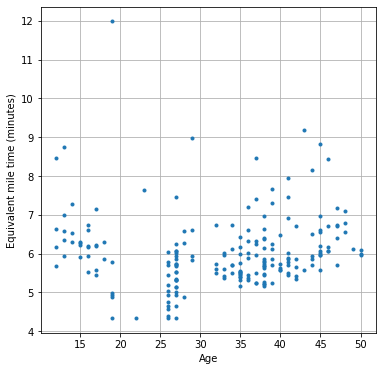

In [168]:
# This graph shows how good my performances have been through time. 
# It looks like my ability to run a 5 minute mile probably expired around 33.
# It would be easier to see if I filtered out distances below 1 mile in this plot and one above.
fix, ax = plt.subplots(figsize=(6, 6))
plt.plot(corrected_races[' Age'], corrected_races['mile_time'], '.')
ax.set_ylabel('Equivalent mile time (minutes)')
ax.set_xlabel('Age')
ax.grid()

Best races at distance 1.000000 miles
          Date   Age  this_distance                Description
32  1991-05-01    19       4.870000   Track meet mile  Glasgow
72  1999-07-21    28       4.880000                 Mapco Mile
61  1999-05-22    27       4.922940            Presbyterian 5k
29  1991-04-01    19       4.936830           St Andrews 1500m
33  1991-05-01    19       4.996769     Track meet 5k  Glasgow


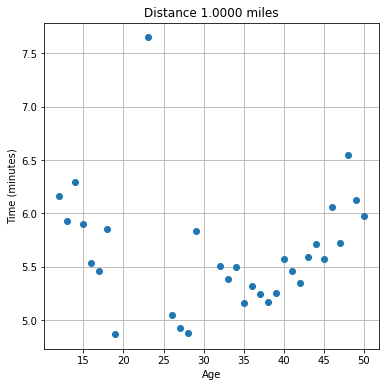

            Date   Miles    Mins   Pace   Mins25   Pace25  \
 Age                                                        
12    1983-09-04   6.000   42.75   7.12    42.75     7.12   
13    1984-09-01   0.932    6.50   6.61     6.50     6.61   
14    1985-09-01   0.932    6.05   6.49     6.05     6.49   
15    1986-09-07   3.108   21.33   6.84    21.33     6.84   
16    1987-08-01   3.000   21.00   6.30    21.00     6.30   
17    1988-08-07   4.000   27.67   6.15    27.67     6.15   
18    1989-09-02   6.215   45.28   6.94    45.28     6.94   
19    1991-04-01   0.932    4.58   4.87     4.58     4.87   
23    1995-07-01  13.112  119.20   9.09   119.20     9.09   
26    1998-04-04   1.000    5.05   5.05     5.05     5.05   
27    1998-07-22   1.000    5.02   5.02     5.00     5.00   
28    1999-07-21   1.000    4.88   4.88     4.87     4.87   
29    2000-07-23   4.000   26.50   6.62    26.35     6.59   
32    2003-07-26   3.000   17.93   5.98    17.72     5.91   
33    2004-09-05   6.000

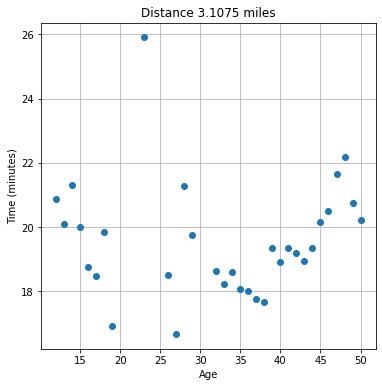

            Date   Miles    Mins   Pace   Mins25   Pace25  \
 Age                                                        
12    1983-09-04   6.000   42.75   7.12    42.75     7.12   
13    1984-09-01   4.000   26.45   6.61    26.45     6.61   
14    1985-09-01   4.000   32.50   7.46    32.50     7.46   
15    1986-09-07   3.108   21.33   6.84    21.33     6.84   
16    1987-08-01   3.000   21.00   6.30    21.00     6.30   
17    1988-08-07   4.000   27.67   6.15    27.67     6.15   
18    1989-09-02   6.215   45.28   6.94    45.28     6.94   
19    1991-05-01   3.108   16.92   5.44    16.92     5.44   
23    1995-07-01  13.112  119.20   9.09   119.20     9.09   
26    1998-04-04   3.108   19.33   6.22    19.33     6.22   
27    1998-07-23   3.108   16.67   5.36    16.63     5.35   
28    2000-03-01   4.000   28.00   7.00    27.90     6.97   
29    2000-07-23   4.000   26.50   6.62    26.35     6.59   
32    2003-07-26   3.000   17.93   5.98    17.72     5.91   
33    2004-09-05   6.000

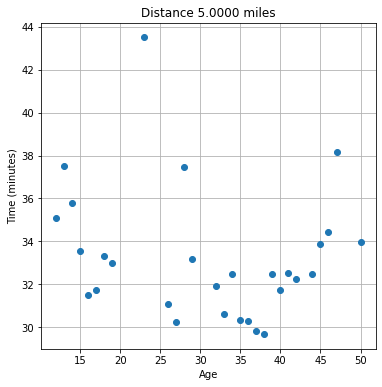

            Date   Miles    Mins   Pace   Mins25   Pace25  \
 Age                                                        
12    1983-09-04   6.000   42.75   7.12    42.75     7.12   
13    1984-09-01   5.000   37.50   7.50    37.50     7.50   
14    1985-09-01   9.000   67.17   7.46    67.17     7.46   
15    1986-09-07   6.215   42.50   6.84    42.50     6.84   
16    1987-09-06   5.000   31.50   6.30    31.50     6.30   
17    1988-09-03   6.215   51.50   6.61    51.50     6.61   
18    1989-09-02   6.215   45.28   6.94    45.28     6.94   
19    1991-05-15  13.112   90.33   6.89    90.33     6.89   
23    1995-07-01  13.112  119.20   9.09   119.20     9.09   
26    1998-04-25   6.215   39.33   6.33    39.33     6.33   
27    1998-07-23   6.215   39.80   6.18    39.72     6.17   
28    2000-07-01  13.112  102.68   7.83   102.28     7.80   
29    2000-07-23   6.215   47.52   6.88    47.22     6.84   
32    2003-07-26   5.000   32.62   6.50    32.20     6.42   
33    2004-09-05   6.000

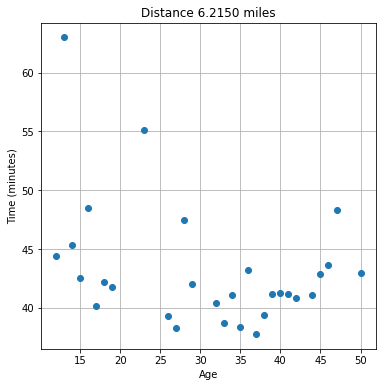

            Date   Miles    Mins   Pace   Mins25   Pace25  \
 Age                                                        
12    1983-09-04   6.000   42.75   7.12    42.75     7.12   
13    1984-09-01   9.000   93.33  10.37    93.33    10.37   
14    1985-09-01   9.000   67.17   7.46    67.17     7.46   
15    1986-09-07   6.215   42.50   6.84    42.50     6.84   
16    1987-11-01   6.215   48.50   7.80    48.50     7.80   
17    1988-09-03   6.215   51.50   6.61    51.50     6.61   
18    1989-09-02   6.215   45.28   6.94    45.28     6.94   
19    1991-05-15  13.112   90.33   6.89    90.33     6.89   
23    1995-07-01  13.112  119.20   9.09   119.20     9.09   
26    1998-04-25   6.215   39.33   6.33    39.33     6.33   
27    1998-07-23   6.215   39.80   6.18    39.72     6.17   
28    2000-07-01  13.112  102.68   7.83   102.28     7.80   
29    2000-07-23   6.215   47.52   6.88    47.22     6.84   
32    2004-03-28   6.215   40.40   6.50    39.88     6.42   
33    2004-09-05   6.000

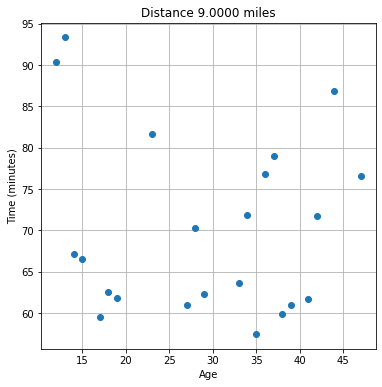

            Date   Miles    Mins   Pace   Mins25   Pace25  \
 Age                                                        
12    1984-06-02   9.200   92.50  10.05    92.50    10.05   
13    1984-09-01   9.000   93.33  10.37    93.33    10.37   
14    1985-09-01   9.000   67.17   7.46    67.17     7.46   
15    1986-09-07   9.000   66.50   7.39    66.50     7.39   
17    1988-09-11   9.000   59.50   6.61    59.50     6.61   
18    1989-09-10   9.000   62.50   6.94    62.50     6.94   
19    1991-05-15  13.112   90.33   6.89    90.33     6.89   
23    1995-07-01  13.112  119.20   9.09   119.20     9.09   
27    1998-07-23   9.000   61.25   6.79    61.12     6.77   
28    2000-07-01  13.112  102.68   7.83   102.28     7.80   
29    2000-07-23  13.112  111.50   6.88   110.87     6.84   
33    2004-09-12  12.600   90.00   7.09    88.32     6.96   
34    2005-12-11  13.112  105.00   8.01   102.27     7.80   
35    2007-07-07   9.323   59.62   6.39    58.07     6.23   
36    2007-09-15   8.700

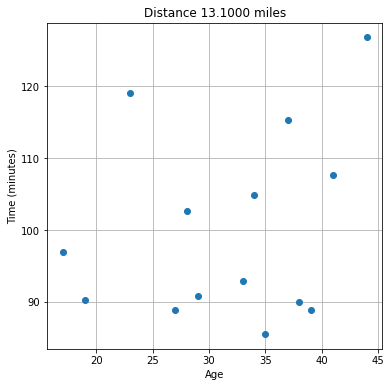

            Date   Miles    Mins   Pace   Mins25   Pace25  \
 Age                                                        
17    1988-10-18  13.112   97.08   7.40    97.08     7.40   
19    1991-05-15  13.112   90.33   6.89    90.33     6.89   
23    1995-07-01  13.112  119.20   9.09   119.20     9.09   
27    1998-07-26  13.112   89.02   6.79    88.82     6.77   
28    2000-07-01  13.112  102.68   7.83   102.28     7.80   
29    2000-07-23  13.112  111.50   6.88   110.87     6.84   
33    2004-09-12  12.600   90.00   7.09    88.32     6.96   
34    2005-12-11  13.112  105.00   8.01   102.27     7.80   
35    2007-07-07  12.430   81.25   6.54    79.10     6.36   
37    2008-09-18  26.224  243.47   9.28   230.28     8.78   
38    2009-08-08  13.112   90.13   6.87    85.80     6.54   
39    2010-07-25  13.112   89.02   6.79    84.07     6.41   
41    2012-07-22  13.112  107.82   8.22    98.50     7.51   
44    2015-11-29  26.224  267.83  10.21   229.88     8.77   

                      D

In [196]:
# Let us loop over a set of distances, correct any longer runs (and up to 7% shorter) to that distance but eliminate shorter ones
import warnings
warnings.filterwarnings("ignore")
distances = [1.0, 3.1075, 5.0, 6.215, 9.0, 13.1]
for this_distance in distances:
    min_distance = this_distance * 0.93 # this includes 1500m in mile comparisons
    
    # filter
    filtered_races = corrected_races[corrected_races[' Miles']>min_distance]
    
    # correct filtered_races to this_distance
    filtered_races['this_distance']=filtered_races[' Mins']/distance_worldrecord_poly(filtered_races[' Miles']) * distance_worldrecord_poly(this_distance)
    
    
    # print out the top 5
    filtered_races.sort_values(by=['this_distance'], inplace=True)
    #print(filtered_races)
    
    print('Best races at distance %f miles' % this_distance)
    print(filtered_races[0:5][['Date',' Age','this_distance',' Description']])

    """
    fix, ax = plt.subplots(figsize=(6, 6))
    plt.plot(filtered_races[' Age'], filtered_races['this_distance'], '.')
    ax.set_ylabel('Time (minutes)')
    ax.set_xlabel('Age')
    ax.grid()
    plt.show()
    """
    
    fix, ax = plt.subplots(figsize=(6, 6))
    best_by_age = filtered_races.groupby([' Age']).min()
    best_by_age['this_distance'].plot(marker='o', linestyle='',legend=False)
    
    
    
    #plt.plot(best_by_age[' Age'], best_by_age['this_distance'], '.')
    ax.set_ylabel('Time (minutes)')
    ax.set_xlabel('Age')
    ax.set_title('Distance %.4f miles' % this_distance)
    ax.grid()
    plt.show()    
    
    print(best_by_age)

    

In [169]:
# Now let us do a similar thing, but plot all runs at each distance against age

0.9322560596643878


In [201]:
5.22/13*60/6.215

3.876477504796089

Best races at distance 1.000000 miles
           Date   Age  this_distance                Description
32   1991-05-01    19       4.870000   Track meet mile  Glasgow
72   1999-07-21    28       4.870000                 Mapco Mile
61   1999-05-22    27       4.911127            Presbyterian 5k
29   1991-04-01    19       4.936830           St Andrews 1500m
163  2013-07-20    42       4.980000                Golden Mile


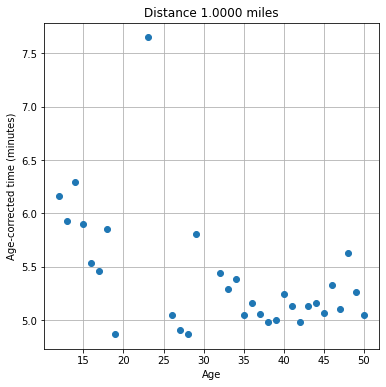

Best races at distance 3.107500 miles
           Date   Age  this_distance              Description
61   1999-05-22    27      16.627087          Presbyterian 5k
33   1991-05-01    19      16.917037   Track meet 5k  Glasgow
140  2010-07-17    38      16.932456               Valkyeries
201  2021-11-06    50      17.100958    Trot thru the terrace
120  2009-06-19    37      17.115064         Midnight Sun Run


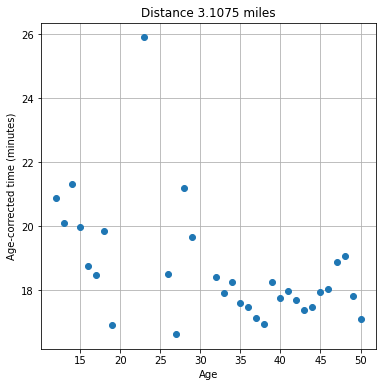

Best races at distance 5.000000 miles
           Date   Age  this_distance                        Description
140  2010-07-17    38      28.443396                         Valkyeries
201  2021-11-06    50      28.726448              Trot thru the terrace
120  2009-06-19    37      28.750143                   Midnight Sun Run
200  2021-10-23    50      29.279335   Fast tempo run  Lake Carrollwood
172  2016-06-18    44      29.342522                   Midnight Sun Run


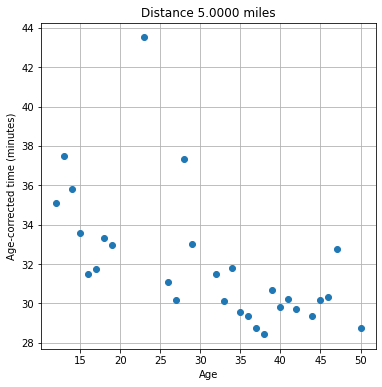

Best races at distance 6.215000 miles
           Date   Age  this_distance                        Description
201  2021-11-06    50          36.37              Trot thru the terrace
120  2009-06-19    37          36.40                   Midnight Sun Run
200  2021-10-23    50          37.07   Fast tempo run  Lake Carrollwood
172  2016-06-18    44          37.15                   Midnight Sun Run
98   2007-06-23    35          37.43                   Midnight Sun Run


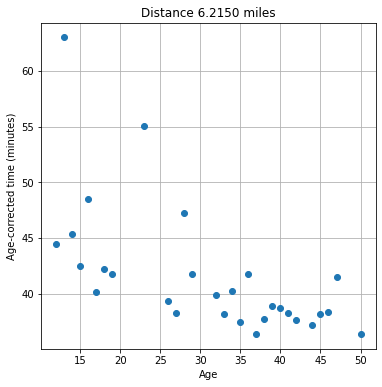

Best races at distance 9.000000 miles
           Date   Age  this_distance  \
105  2007-07-07    35      55.986833   
104  2007-07-07    35      56.069903   
103  2007-07-07    35      57.060865   
128  2009-09-12    38      57.149264   
159  2012-10-27    41      57.236157   

                                         Description  
105                                       strava 15k  
104                                      strava 10 m  
103                                       strava 20k  
128   Final leg of Skagway-Whitehorse Klondike Relay  
159                                    Halloween Run  


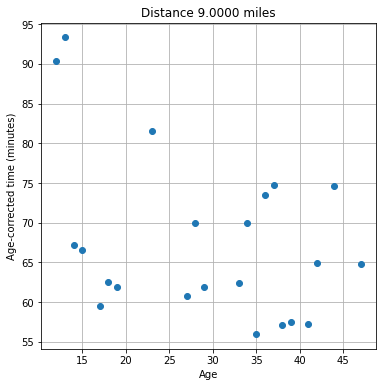

Best races at distance 13.100000 miles
           Date   Age  this_distance        Description
103  2007-07-07    35      83.269803         strava 20k
102  2007-07-07    35      83.625366      strava half m
143  2010-08-07    39      83.995036   Santa Claus Half
101  2007-07-07    35      84.194858   Santa Claus Half
125  2009-08-08    38      85.723494   Santa Claus Half


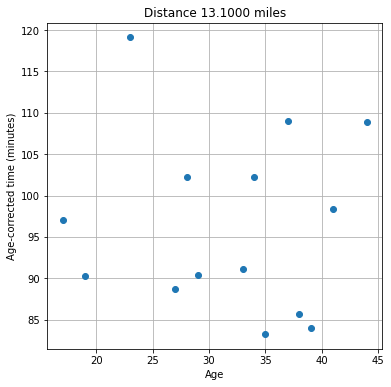

In [193]:
# Let us loop over a set of distances, correct any longer runs (and up to 7% shorter) to that distance but eliminate shorter ones
import warnings
warnings.filterwarnings("ignore")
distances = [1.0, 3.1075, 5.0, 6.215, 9.0, 13.1]
for this_distance in distances:
    min_distance = this_distance * 0.93 # this includes 1500m in mile comparisons
    
    # filter
    filtered_races = corrected_races[corrected_races[' Miles']>min_distance]
    
    # correct filtered_races to this_distance
    filtered_races['this_distance']=filtered_races[' Mins25']/distance_worldrecord_poly(filtered_races[' Miles']) * distance_worldrecord_poly(this_distance)
    
    
    # print out the top 5
    filtered_races.sort_values(by=['this_distance'], inplace=True)
    #print(filtered_races)
    
    print('Best races at distance %f miles' % this_distance)
    print(filtered_races[0:5][['Date',' Age','this_distance',' Description']])

    """
    fix, ax = plt.subplots(figsize=(6, 6))
    plt.plot(filtered_races[' Age'], filtered_races['this_distance'], '.')
    ax.set_ylabel('Time (minutes)')
    ax.set_xlabel('Age')
    ax.grid()
    plt.show()
    """
    
    fix, ax = plt.subplots(figsize=(6, 6))
    best_by_age = filtered_races.groupby([' Age']).min()
    best_by_age['this_distance'].plot(marker='o', linestyle='',legend=False)
    
    #plt.plot(best_by_age[' Age'], best_by_age['this_distance'], '.')
    ax.set_ylabel('Age-corrected time (minutes)')
    ax.set_xlabel('Age')
    ax.set_title('Distance %.4f miles' % this_distance)
    ax.grid()
    plt.show()    

In [208]:
# Conclusions - how much am I slowing down?
# 1 mile: 3.93 s/mile/year
# 5k: 4.05 s/mile/year
# 10k: 3.87 s/mile/year

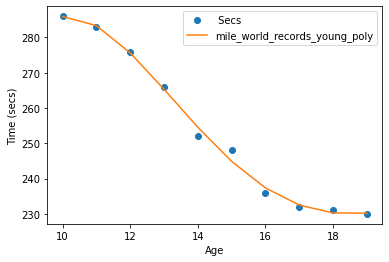

In [207]:
mile_world_records_young = pd.read_csv('mile_world_records_young.csv', index_col=0)
mile_world_records_young.plot(marker='o',linestyle='')
plt.ylabel('Time (secs)')

# Fit a polynomial at same x
mile_world_records_young_poly = np.polynomial.polynomial.Polynomial.fit(mile_world_records_young.index, mile_world_records_young[' Secs'], 4)
plt.plot(mile_world_records_young.index, mile_world_records_young_poly(mile_world_records_young.index), label='mile_world_records_young_poly')
plt.legend()

In [ ]:
# Use that polynomial to age correct times before 20